<a href="https://colab.research.google.com/github/roycanchica79/skills-introduction-to-github/blob/dependabot%2Fgithub_actions%2Factions%2Fcheckout-4/Modelos_de_Regresi%C3%B3n(ROY).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm



 Cargar los datos

In [ ]:
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

Mostrar las primeras filas del dataset

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Regresión Lineal
Vamos a modelar la relación entre el ingreso anual (Annual Income (k$)) y el puntaje de gasto (Spending Score (1-100)).
-  Variables

In [ ]:
X = data['Annual Income (k$)']
y = data['Spending Score (1-100)']

- División de los datos en entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Añadir una constante a X

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

- Modelo de regresión lineal

In [ ]:
model = sm.OLS(y_train, X_train).fit()

- Resumen del modelo

In [ ]:
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Spending Score (1-100)   R-squared:                       0.004
Model:                                OLS   Adj. R-squared:                 -0.002
Method:                     Least Squares   F-statistic:                    0.6038
Date:                    Sat, 15 Jun 2024   Prob (F-statistic):              0.438
Time:                            21:09:48   Log-Likelihood:                -750.09
No. Observations:                     160   AIC:                             1504.
Df Residuals:                         158   BIC:                             1510.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 48.1685      5.091      9.462      0.000      38.114      58.223
Annual Income (k$)     0.0595      0.077      0.777      0.438      -0.092       0.211
==============================================================================
Omnibus:                       13.941   Durbin-Watson:                   2.291
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                5.221
Skew:                          -0.112   Prob(JB):                       0.0735
Kurtosis:                       2.144   Cond. No.                         162.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Visualización del Modelo de Regresión Lineal
-  Predicciones

In [ ]:
y_pred = model.predict(X_test)

- Gráfico de dispersión y línea de regresión

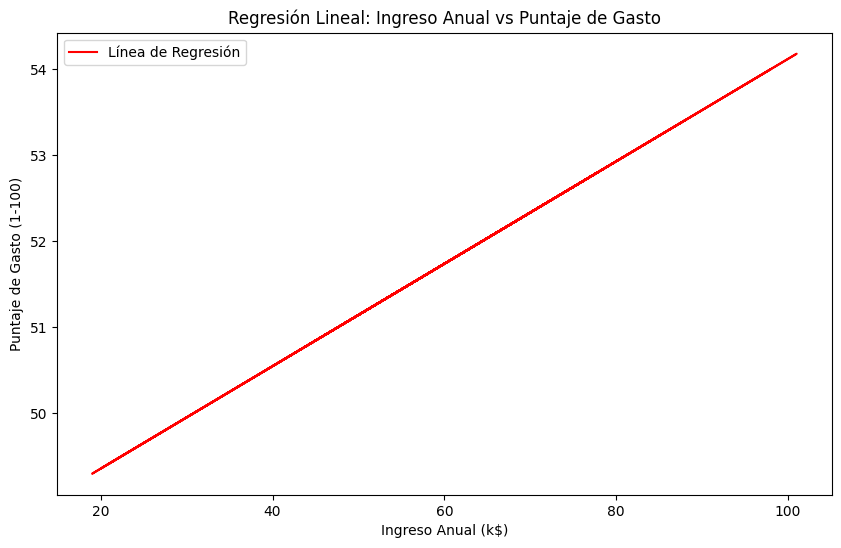

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(X_test['Annual Income (k$)'], y_pred, color='red', label='Línea de Regresión')
plt.xlabel('Ingreso Anual (k$)')
plt.ylabel('Puntaje de Gasto (1-100)')
plt.title('Regresión Lineal: Ingreso Anual vs Puntaje de Gasto')
plt.legend()
plt.show()

# Regresión Múltiple
- Modelamos el puntaje de gasto utilizando múltiples variables independientes.
-Variables independientes

In [ ]:
X_multiple = data[['Age', 'Annual Income (k$)', 'Gender']]

- Transformación de 'Gender' será necesaria
- Variables independientes

In [ ]:
X = data[['Age', 'Annual Income (k$)', 'Gender']]


- Codificación de variable categórica 'Gender'

In [ ]:
X = pd.get_dummies(X, drop_first=True)

- Variable dependiente

In [ ]:
y = data['Spending Score (1-100)']

- División de los datos

In [ ]:
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=42)

- Añadir una constante a X

In [ ]:
X_train_multiple = sm.add_constant(X_train_multiple)
X_test_multiple = sm.add_constant(X_test_multiple)

- Modelo de regresión múltipe

In [ ]:
model_multiple = sm.OLS(y_train, X_train).fit()

- Resumen del modelo

In [ ]:
model_multiple_summary = model_multiple.summary()
print(model_multiple_summary)

                              OLS Regression Results                              
Dep. Variable:     Spending Score (1-100)   R-squared:                       0.004
Model:                                OLS   Adj. R-squared:                 -0.002
Method:                     Least Squares   F-statistic:                    0.6038
Date:                    Sat, 15 Jun 2024   Prob (F-statistic):              0.438
Time:                            21:45:48   Log-Likelihood:                -750.09
No. Observations:                     160   AIC:                             1504.
Df Residuals:                         158   BIC:                             1510.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

Estos ejemplos muestran cómo podemos aplicar conceptos estadísticos y de machine learning para entender y modelar datos reales. La correlación nos ayuda a identificar relaciones potenciales, mientras que la regresión lineal y múltiple nos permiten cuantificar estas relaciones y hacer predicciones. Los gráficos proporcionan una visualización clara de los resultados y relaciones identificadas.